reference: https://uppsala.instructure.com/courses/28112/pages/4-player-movements-on-the-pitch

In [1]:
import Metrica_IO as mio
import Metrica_Viz as mviz

In [2]:
# set up initial path to data
DATADIR = '../sample-data/data/'

game_id = 2 # let's look at sample match 2

# read in the event data
events = mio.read_event_data(DATADIR,game_id)

# count the number of each event type in the data
print( events['Type'].value_counts() )

Type
PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: count, dtype: int64


In [3]:
events.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58


In [4]:
# switch to metric coordinates
# soccer field 106 m x 68 m
events = mio.to_metric_coordinates(events)

In [5]:
events.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


In [6]:
x_columns = [c for c in events.columns if c[-1].lower()=='x']
print(x_columns)

['Start X', 'End X']


In [7]:
# Get events by team
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

# Frequency of each event type by team
print(home_events['Type'].value_counts())
print(away_events['Type'].value_counts())

Type
PASS              543
CHALLENGE         160
RECOVERY          135
BALL LOST         120
SET PIECE          34
BALL OUT           27
SHOT               13
FAULT RECEIVED      9
CARD                3
Name: count, dtype: int64
Type
PASS              421
CHALLENGE         151
BALL LOST         113
RECOVERY          113
SET PIECE          46
BALL OUT           22
SHOT               11
FAULT RECEIVED     11
CARD                3
Name: count, dtype: int64


In [8]:
# Get all shots
shots = events[events['Type']=='SHOT']
home_shots = home_events[home_events.Type=='SHOT']
away_shots = away_events[away_events.Type=='SHOT']

In [9]:
# Look at frequency of each shot Subtype
print(home_shots['Subtype'].value_counts())
print()
print(away_shots['Subtype'].value_counts())

Subtype
ON TARGET-SAVED        4
HEAD-OFF TARGET-OUT    4
OFF TARGET-OUT         2
ON TARGET-GOAL         2
HEAD-ON TARGET-GOAL    1
Name: count, dtype: int64

Subtype
OFF TARGET-OUT         3
BLOCKED                2
ON TARGET-GOAL         2
ON TARGET-SAVED        2
OFF TARGET-HEAD-OUT    1
HEAD-OFF TARGET-OUT    1
Name: count, dtype: int64


In [10]:
# Look at the number of shots taken by each home player
print( home_shots['From'].value_counts() )

From
Player9     4
Player10    3
Player5     2
Player3     1
Player4     1
Player7     1
Player12    1
Name: count, dtype: int64


In [11]:
# Get the shots that led to a goal
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')].copy(deep=True)
away_goals = away_shots[away_shots['Subtype'].str.contains('-GOAL')].copy(deep=True)
# Add a column event 'Minute' to the data frame
home_goals['Minute'] = home_goals['Start Time [s]']/60.

Text(-47.7, -3.400000000000003, '')

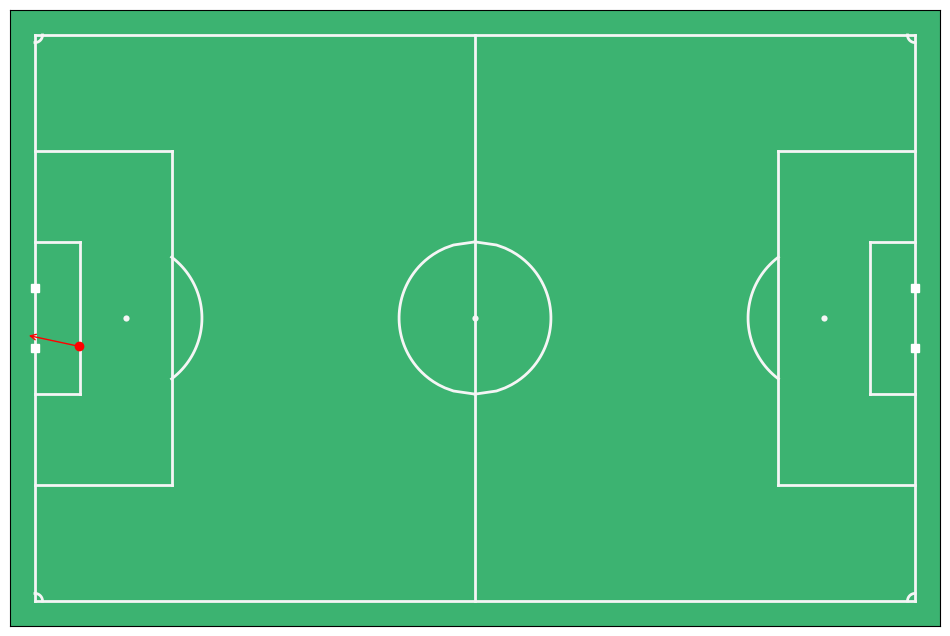

In [12]:
# Plot the first goal
fig,ax = mviz.plot_pitch()
ax.plot( events.loc[198]['Start X'], events.loc[198]['Start Y'], 'ro' )
ax.annotate("", xy=events.loc[198][['End X','End Y']], 
            xytext=events.loc[198][['Start X','Start Y']], 
            alpha=0.6, 
            arrowprops=dict(arrowstyle="->",color='r'))


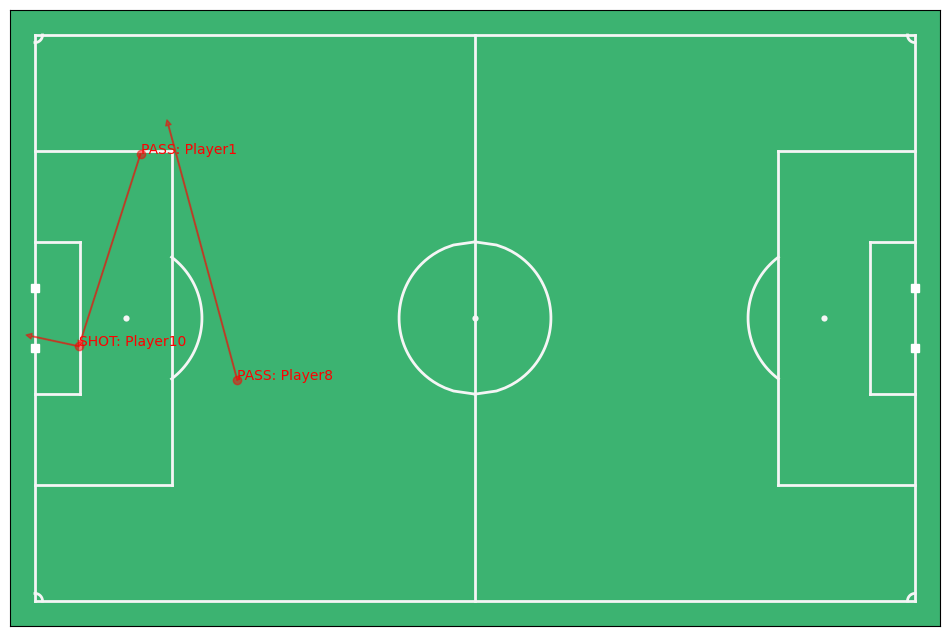

In [13]:
# plot passing move in run up to goal
mviz.plot_events( events.loc[196:198], indicators = ['Marker','Arrow'], annotate=True );

### Tracking data

In [14]:
# READING IN TRACKING DATA
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

Reading team: home
Reading team: away


In [15]:
tracking_home.shape

(141156, 32)

In [16]:
# Look at the column namems
print( tracking_home.columns )

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')


In [17]:
# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

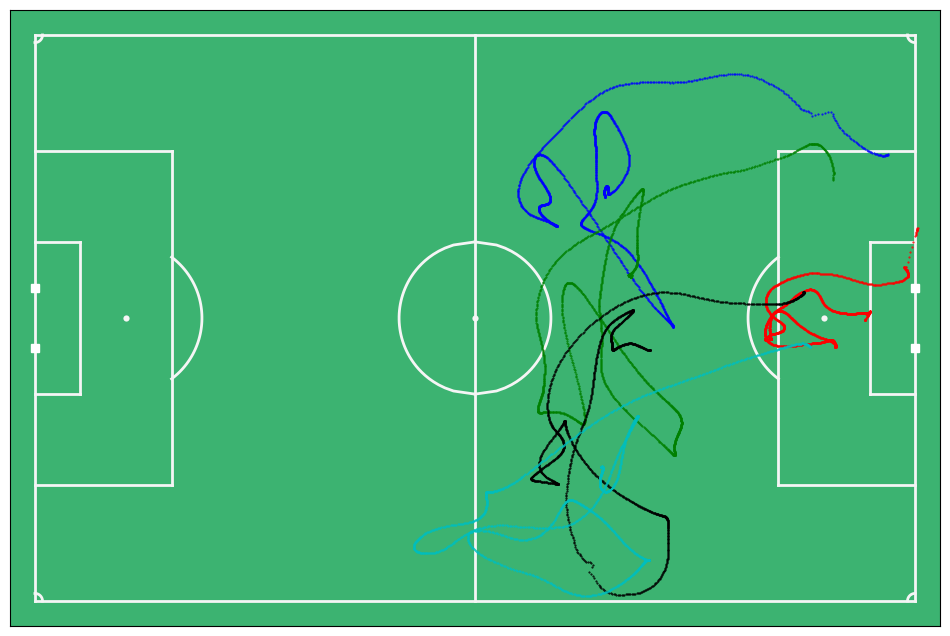

In [18]:
# Plot some player trajectories (players 11,1,2,3,4)
fig,ax = mviz.plot_pitch()
ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', markersize=1)
ax.plot( tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', markersize=1)
ax.plot( tracking_home['Home_2_x'].iloc[:1500], tracking_home['Home_2_y'].iloc[:1500], 'g.', markersize=1)
ax.plot( tracking_home['Home_3_x'].iloc[:1500], tracking_home['Home_3_y'].iloc[:1500], 'k.', markersize=1)
ax.plot( tracking_home['Home_4_x'].iloc[:1500], tracking_home['Home_4_y'].iloc[:1500], 'c.', markersize=1);

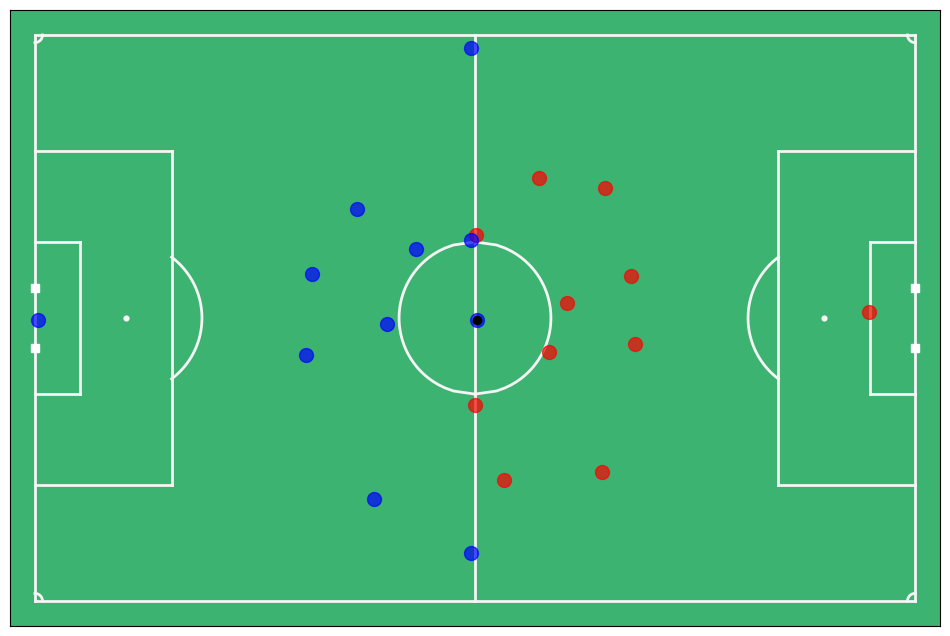

In [19]:
# plot player positions at ,atckick-off
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )

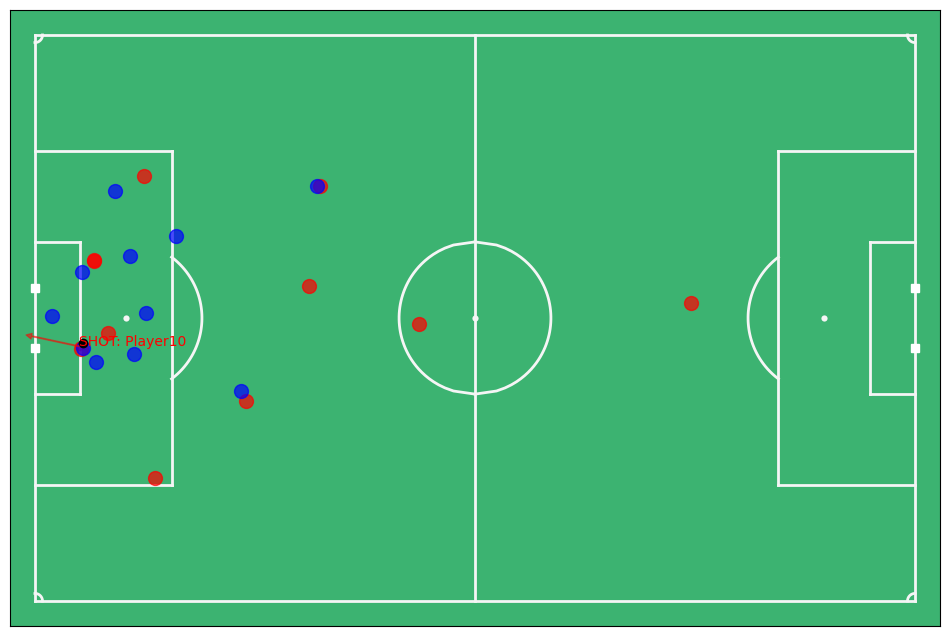

In [20]:
# PLOT POISTIONS AT GOAL
fig,ax = mviz.plot_events( events.loc[198:198], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[198]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )

In [ ]:
# END 